In [117]:
#download or load data set
from torch.utils.data import Dataset
import torch
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import torch.utils.data as data


def download_dataset(dataset_path,dataset_name):
    if dataset_name == "CIFAR10":
        train_dataset = datasets.CIFAR10(root=dataset_path, train=True,download=True)
        data_mean = (train_dataset.data / 255.0).mean(axis=(0,1,2))
        data_std = (train_dataset.data / 255.0).std(axis=(0,1,2))
        return data_mean,data_std
    else:
        raise NotImplementedError("downloading for this dataset is not implemented")

def get_cifar10_labels():
    labels = ["airplane","automobile","bird","cat",
              "deer","dog","frog","horse","ship","truck"]
    return labels

In [89]:
download_dataset("./data","CIFAR10")

Files already downloaded and verified


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [90]:
train_dataset = datasets.CIFAR10(root="./data", train=True,download=True)

Files already downloaded and verified


In [97]:
def show_images(imgs,nrow,ncol,titles = None):
    '''
    --args 
    imgs: a list of images(PIL or torch.tensor or numpy.ndarray)
    nrow: the number of rows
    ncol: the number of columns
    titles: the tile of each subimages
    
    --returns
    fig and axes
    '''
    fig,axes = plt.subplots(nrow,ncol)
    for i in range(len(imgs)):
        row  = i // ncol
        col = i % ncol
        if titles:
            axes[row,col].set_title(titles[i])
        if isinstance(imgs[i],Image.Image):
            img = np.array(imgs[i])
        elif torch.is_tensor(imgs[i]):
            img = imgs[i].cpu().detach()
            img = img.permute((1,2,0)).numpy()
        elif isinstance(imgs[i], np.ndarray):
            img = imgs[i]
        else:
            raise TypeError("each image must be an PIL or torch.tensor or numpy.ndarray")
        axes[row,col].imshow(img)
        axes[row,col].set_axis_off()
    return fig,axes
        
    

Files already downloaded and verified


(<Figure size 640x480 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

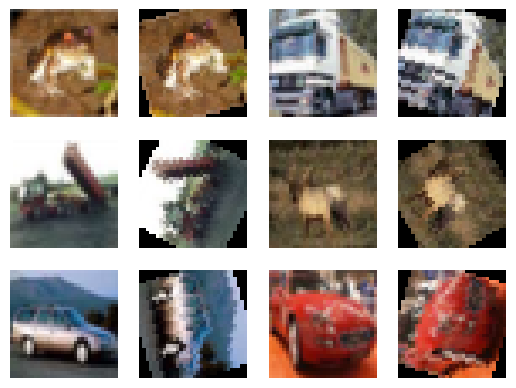

In [133]:
t = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root="./data", train=True,download=True,transform=t)
imgs = [train_dataset[i][0] for i in range(12)]
titles = [labels[train_dataset[i][1]] for i in range(12)]
r = transforms.RandomRotation(90)
imgs = []
for i in range(6):
   imgs.append(train_dataset[i][0]) 
   imgs.append(r(train_dataset[i][0]))
show_images(imgs,3,4)

In [143]:
class ContrastiveTransformations(object):

    def __init__(self, base_transforms, n_views=2):
        self.base_transforms = base_transforms
        self.n_views = n_views

    def __call__(self, x):
        return [self.base_transforms(x) for i in range(self.n_views)]


In [144]:
contrast_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                          transforms.RandomResizedCrop(size=96),
                                          transforms.RandomApply([
                                              transforms.ColorJitter(brightness=0.5,
                                                                     contrast=0.5,
                                                                     saturation=0.5,
                                                                     hue=0.1)
                                          ], p=0.8),
                                          transforms.RandomGrayscale(p=0.2),
                                          transforms.GaussianBlur(kernel_size=9),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5,), (0.5,))
                                         ])

In [158]:
train_dataset = datasets.CIFAR10(root="./data", train=True,download=True,transform=ContrastiveTransformations(contrast_transforms, n_views=3))
loader = data.DataLoader(train_dataset, batch_size=12, shuffle=False)

Files already downloaded and verified


In [171]:
x,y = next(iter(loader))
x[0].shape
#imgs = [x[i,:,:] for i in range(12)]
#show_images(imgs,3,4)

torch.Size([12, 3, 96, 96])

In [166]:
import torch.nn as nn
m = nn.Linear(20, 30)
input = [torch.randn(128, 20),torch.randn(128, 20)]
m(input)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not list